## Sreeja Katanguri 

In [21]:
import numpy as np


## STEP 1:  Creating a Pretrained  Model 

In [22]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [23]:
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## STEP 2 : Loading Letter 'S' Images

In [34]:
from google.colab import files
uploaded = files.upload()

Saving s5.png to s5.png
Saving s4.png to s4.png
Saving s3.png to s3.png
Saving s2.png to s2.png
Saving s1.png to s1 (1).png


In [35]:
# load sample images
images = []
img = tf.keras.utils.load_img('s1 (1).png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s2.png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s3.png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s4.png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s5.png', target_size=(28,28), color_mode="grayscale")
images.append(img)


In [36]:
# predict the images from the sample
input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/255  # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)  # Convert images to a batch of images

predictions = pretrained_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 1s 817ms/step
(5, 784)


## STEP 3 : Displaying the letter S images

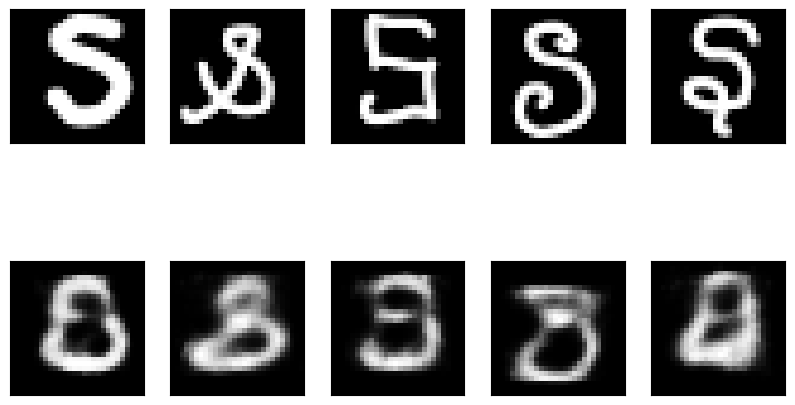

In [37]:
# display the images and their reconstructions side by side
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap="gray")
    
    plt.subplot(2, 5, i+6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predictions[i].reshape(28, 28), cmap="gray")

plt.show()

## STEP 4:  Loading MNIST data 

In [38]:
from tensorflow.keras.datasets import mnist

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [39]:
# Flatten the images for an autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [40]:
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [41]:
# Create bad images and merge with training data
input_arrs = np.array(input_arrs)
bad_images = np.repeat(input_arrs, 27, axis=0)
new_image_set = np.vstack((train_images[:500], bad_images))
np.random.shuffle(new_image_set)

In [42]:
new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow import keras
updated_model = keras.models.load_model('initially_trained_autoencoder.h5')

## STEP 5:  Loading the model with Updated Data

Epoch 1/15
1/1 [==============================] - 3s 3s/step - loss: 0.1781 - val_loss: 0.1764
Epoch 2/15
1/1 [==============================] - 0s 131ms/step - loss: 0.1574 - val_loss: 0.1662
Epoch 3/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1485 - val_loss: 0.1610
Epoch 4/15
1/1 [==============================] - 0s 121ms/step - loss: 0.1437 - val_loss: 0.1607
Epoch 5/15
1/1 [==============================] - 0s 105ms/step - loss: 0.1432 - val_loss: 0.1585
Epoch 6/15
1/1 [==============================] - 0s 101ms/step - loss: 0.1400 - val_loss: 0.1570
Epoch 7/15
1/1 [==============================] - 0s 111ms/step - loss: 0.1377 - val_loss: 0.1549
Epoch 8/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1352 - val_loss: 0.1514
Epoch 9/15
1/1 [==============================] - 0s 110ms/step - loss: 0.1312 - val_loss: 0.1495
Epoch 10/15
1/1 [==============================] - 0s 108ms/step - loss: 0.1285 - val_loss: 0.1474
Epoch 11/15
1/1 [=====

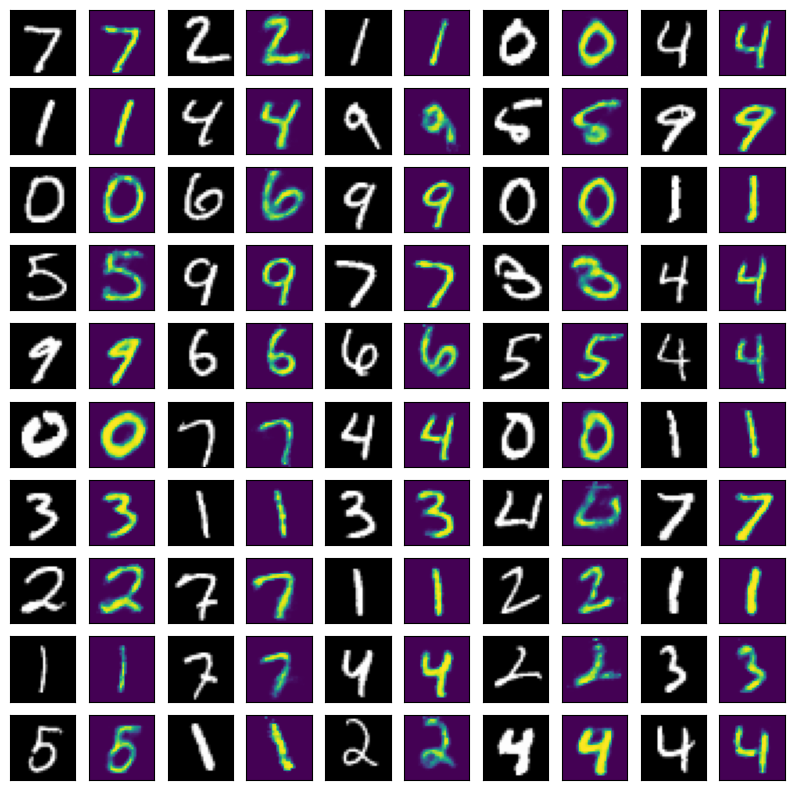

In [43]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with updated data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=15, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()


In [44]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

In [52]:
images = []
img = tf.keras.utils.load_img('s1 (1).png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s2.png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s3.png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s4.png', target_size=(28,28), color_mode="grayscale")
images.append(img)
img = tf.keras.utils.load_img('s5.png', target_size=(28,28), color_mode="grayscale")
images.append(img)

## STEP 6:  Predicting the images from the given sample

In [49]:

input_arrs = []
for img in images:
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr/ 255 # normalize between 0 and 1
    input_arr = input_arr.reshape(784)
    input_arrs.append(input_arr)

input_arrs = np.array(input_arrs)
predictions = updated_model.predict(input_arrs)
print(predictions.shape)

1/1 [==============================] - 0s 25ms/step
(5, 784)


## STEP 7: Comparing of both the images simultaneously 


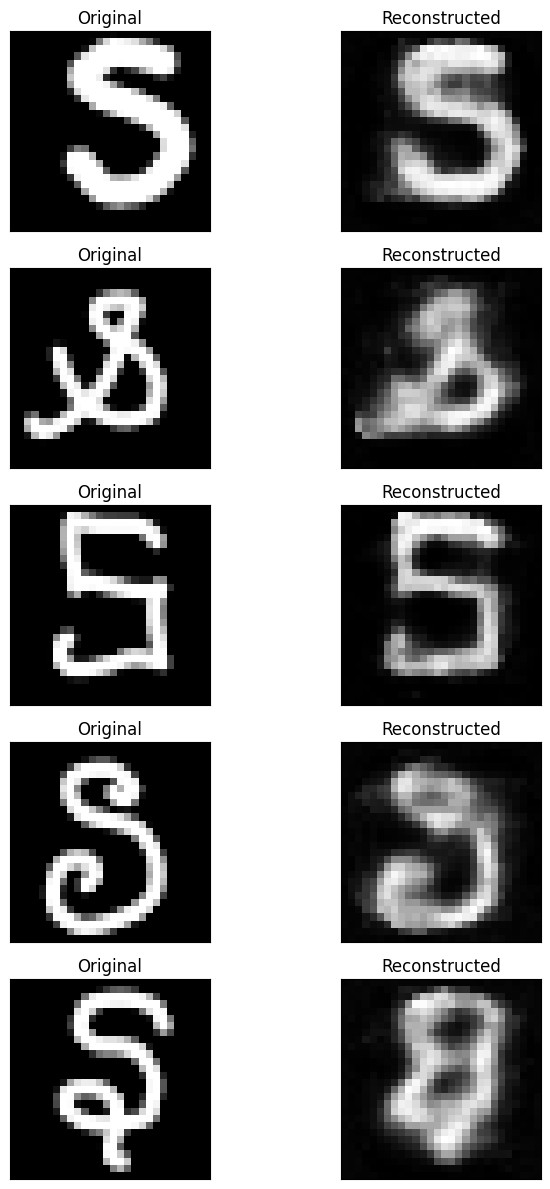

In [50]:

rows = 5
cols = 2
fig, axs = plt.subplots(rows,cols,figsize=(8,12))

for i in range(rows):
    axs[i,0].imshow(images[i], cmap="gray")
    axs[i,0].set_xticks([])
    axs[i,0].set_yticks([])
    axs[i,0].set_title("Original")
    
    axs[i,1].imshow(predictions[i].reshape(28,28), cmap="gray")
    axs[i,1].set_xticks([])
    axs[i,1].set_yticks([])
    axs[i,1].set_title("Reconstructed")

plt.tight_layout()
plt.show()

## STEP 7:  Saving the autoencoder

In [51]:
updated_model.save('updated.h5')

## SUMMARY :

We can see that the original image of letter "s" was not rendered in the displayed image. The results of pre-trained modelling using the MNIST dataset indicate that the newly predicted images are now more similar to the original images. The use of autoencoders in the modeling technique has resulted in matching recontructed images almost similar to that with original images. 
